**Import Liabraries**

In [3]:
!pip install mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
df = pd.read_csv('book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


**EDA**

In [7]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
df[df.duplicated()].sum()

ChildBks     650
YouthBks     351
CookBks      644
DoItYBks     407
RefBks       267
ArtBks       304
GeogBks      385
ItalCook     120
ItalAtlas    23 
ItalArt      36 
Florence     115
dtype: int64

In [9]:
df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [10]:
df.iloc[:,:].sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

**Data Visualisation**

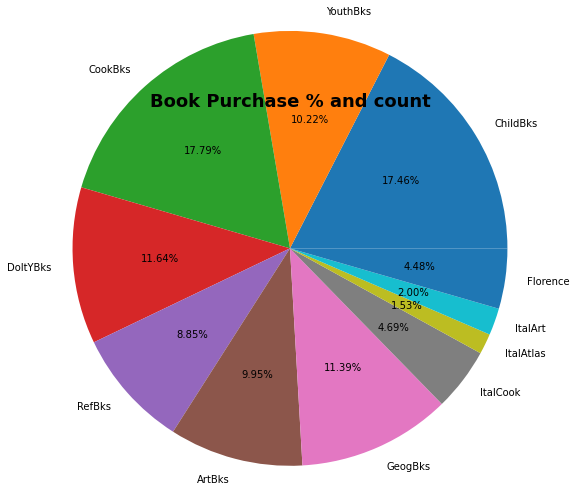

In [11]:
values_book = df.iloc[:,:].sum()
labels_book = df.columns
plt.figure(figsize = [5,5])
plt.pie(values_book, labels=labels_book, autopct= '%.2f%%', radius = 2)
plt.title('Book Purchase % and count', fontsize = 18, fontweight = 'bold')
plt.show()

In [12]:
values_book.sort_values(0, ascending = False, inplace=True)
count = values_book.to_frame().reset_index()
count = count.rename(columns = {'index': 'Movies',0: 'Purchase Frequency'})
count

,Movies,Purchase Frequency
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


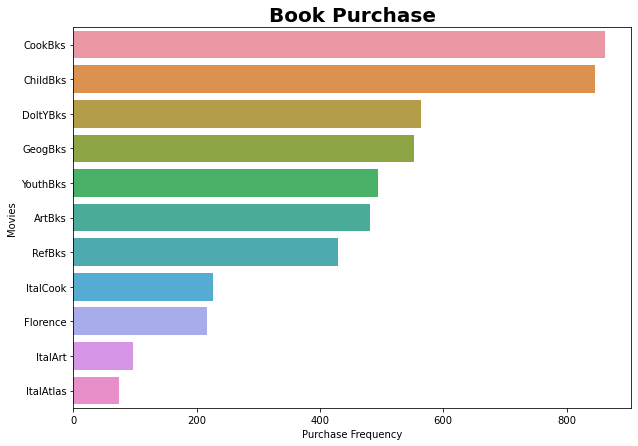

In [13]:
plt.figure(figsize=[10,7])
sns.barplot(x = 'Purchase Frequency', y = 'Movies', data = count)
plt.title('Book Purchase', fontsize=20, fontweight= 'bold')
plt.show()

### Apriori Algorithm

**Min Support = 10% Confidence = 70%**

In [14]:
#with support atleast 0.1 and confidence = 70%
frequent_itemsets = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [15]:
rule = association_rules(frequent_itemsets, metric = "lift", min_threshold = .70)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [16]:
rule.sort_values('lift', ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


**Visualisation of Rule with min Support = 10% and Confidence = 70%**

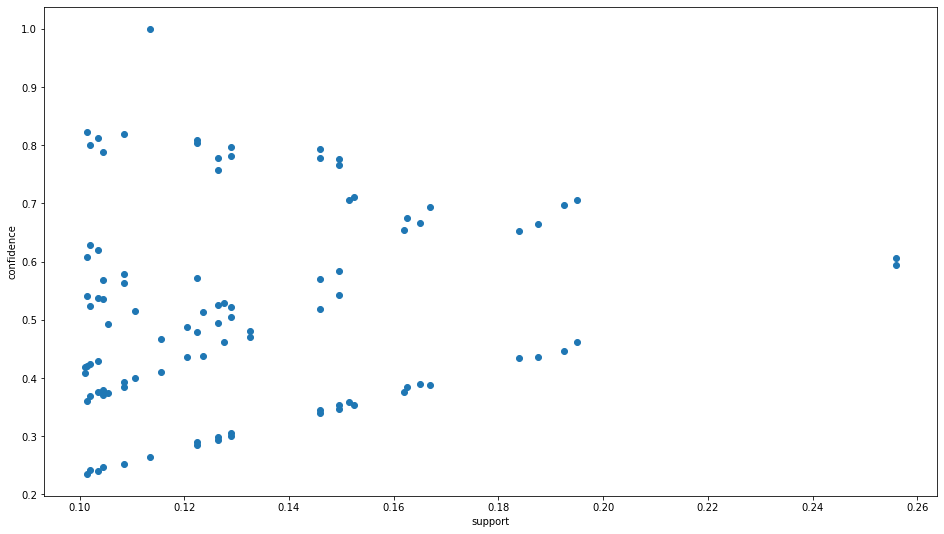

In [17]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule['support'],rule['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

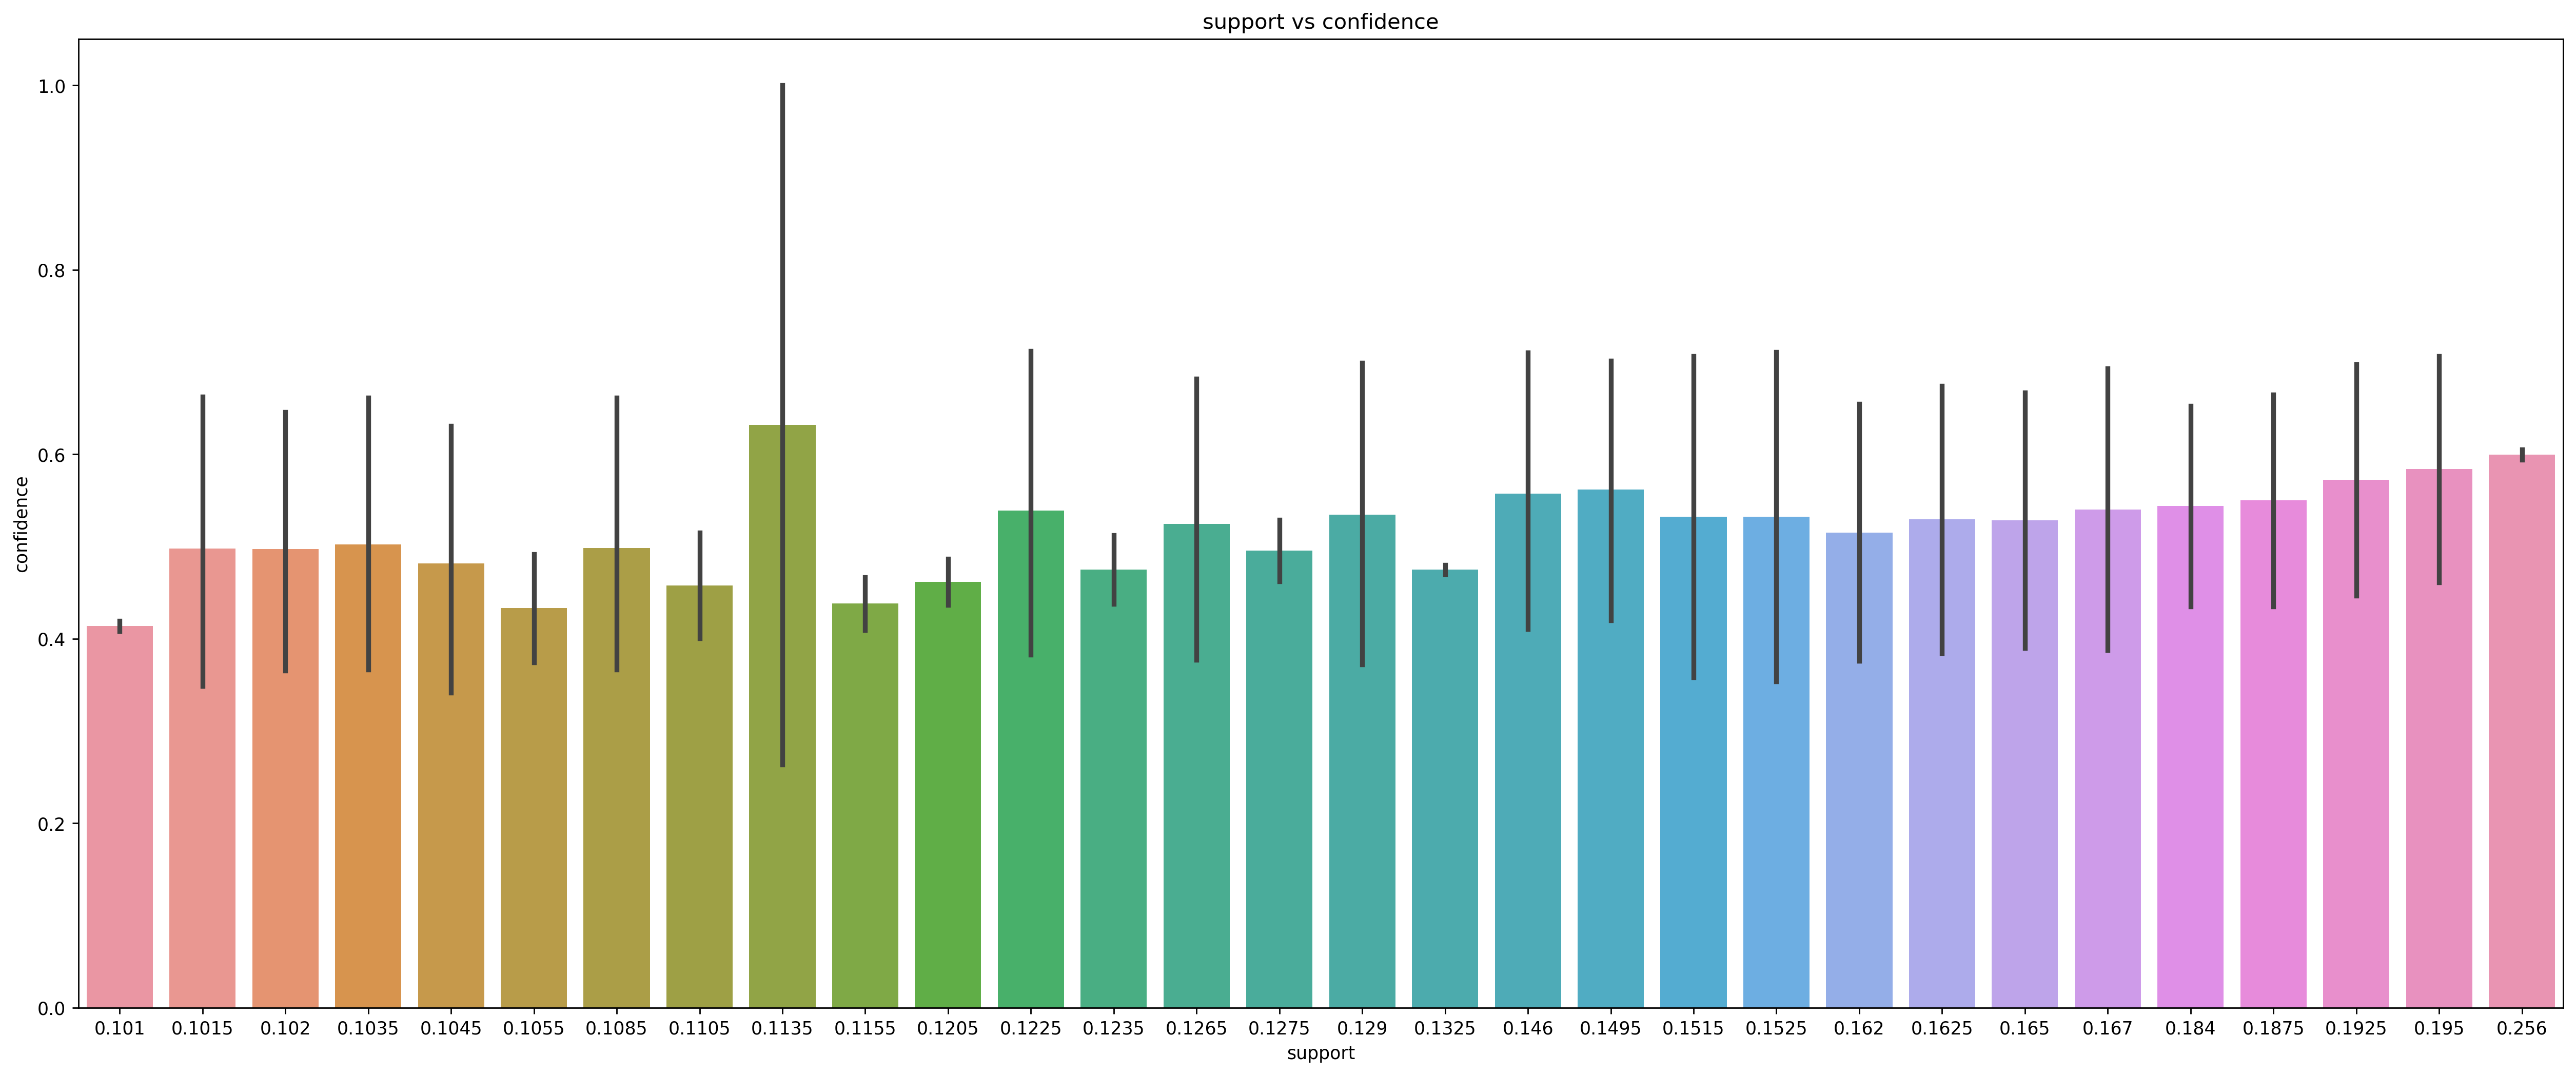

In [18]:
plt.figure(figsize=(25,10),dpi=250)
sns.barplot("support","confidence",data=rule)
plt.title("support vs confidence")
plt.show()

**Min support = 15% Confidence = 70%**

In [19]:
#with support atleast 0.15 and confidence >= 70%
frequent_itemsets1 = apriori(df, min_support = 0.15, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [20]:
rule1 = association_rules(frequent_itemsets1, metric = "lift", min_threshold = .70)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986


We can observe by increasing the min support level we have reduced the number of rules as well.

**Visualisation of rule with min Support = 15% Confidence = 70%**

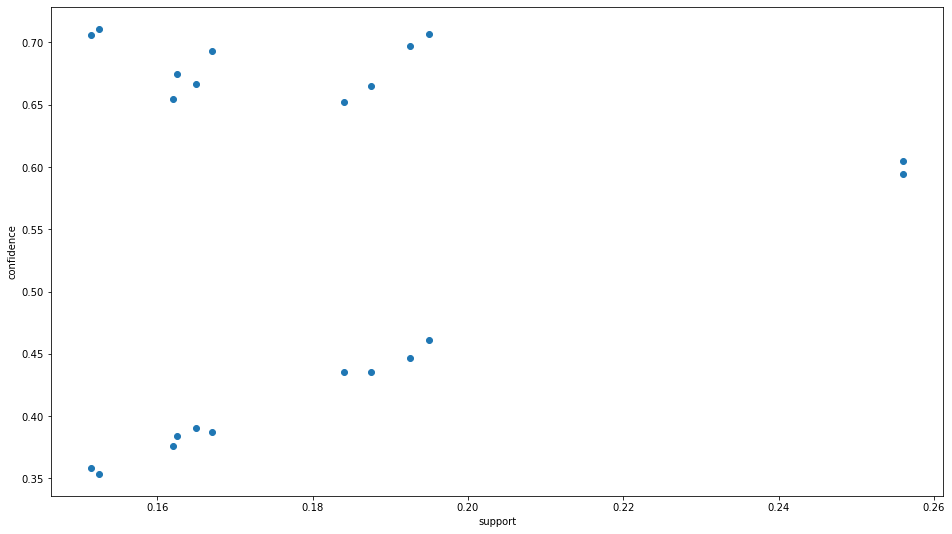

In [22]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule1['support'],rule1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

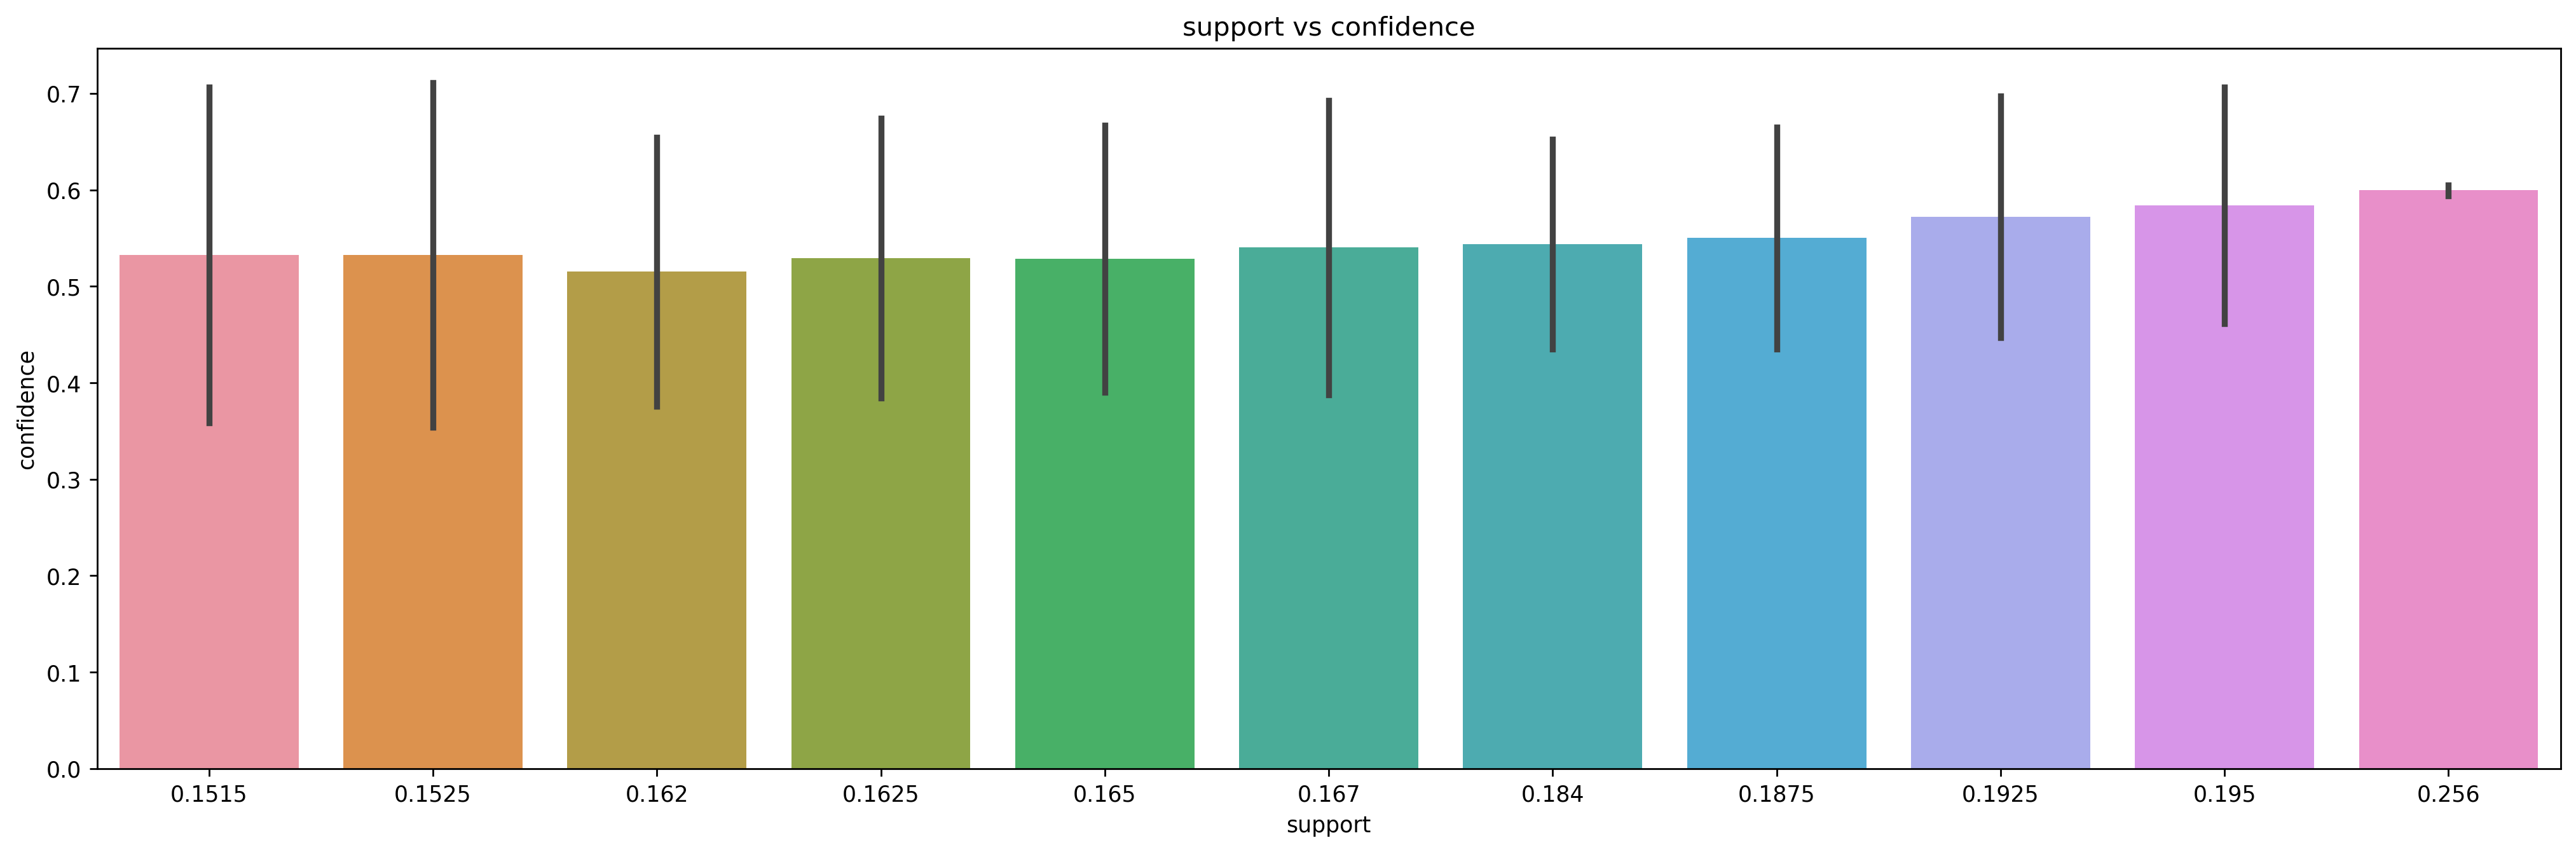

In [23]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rule1)
plt.title("support vs confidence")
plt.show()

**Min Support = 10%, Confidence = 60%**

In [24]:
#with support atleast 0.1 and confidence >= 60%
frequent_itemsets2 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets2.shape

(39, 2)

In [26]:
rule2 = association_rules(frequent_itemsets2, metric = "lift", min_threshold = .60)
rule2.shape


(100, 10)

Even after decreasing confidence the number of rules remain same.

**Visualisation of rule with min Support = 10% Confidence = 60%**

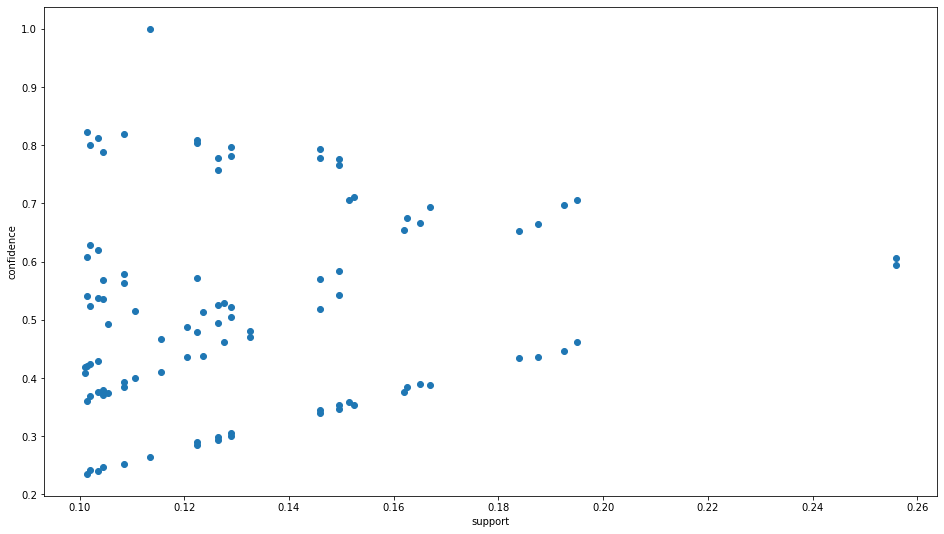

In [27]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule2['support'],rule2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

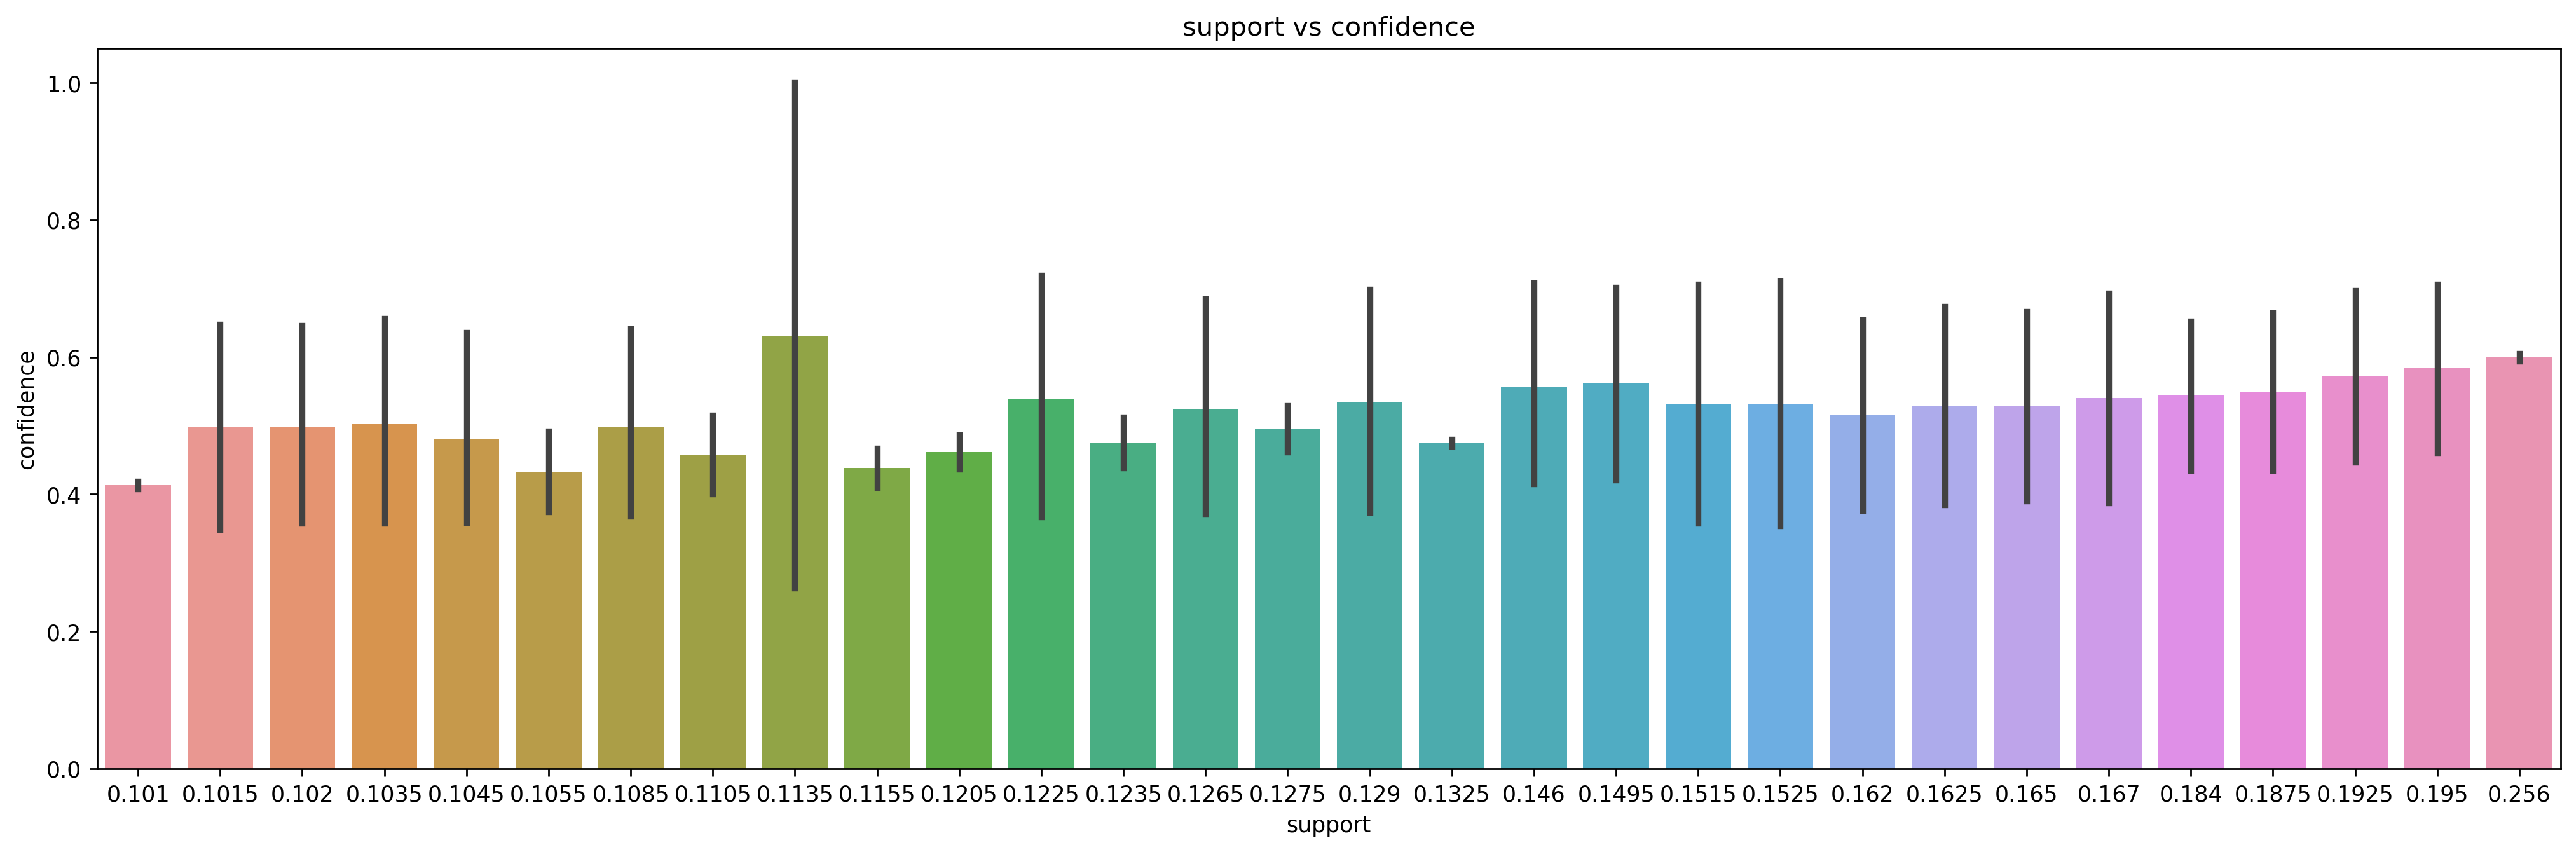

In [28]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rule2)
plt.title("support vs confidence")
plt.show()

**Min Support = 10% Confidence = 80%**

In [29]:
frequent_itemsets3 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets3.shape

(39, 2)

In [30]:
rule3 = association_rules(frequent_itemsets3, metric = "lift", min_threshold = .80)
rule3.shape

(100, 10)

In this dataset there is no change in number of rules by confidence.

**Visualisation of Rule with Min support = 10% Confidence = 80%**

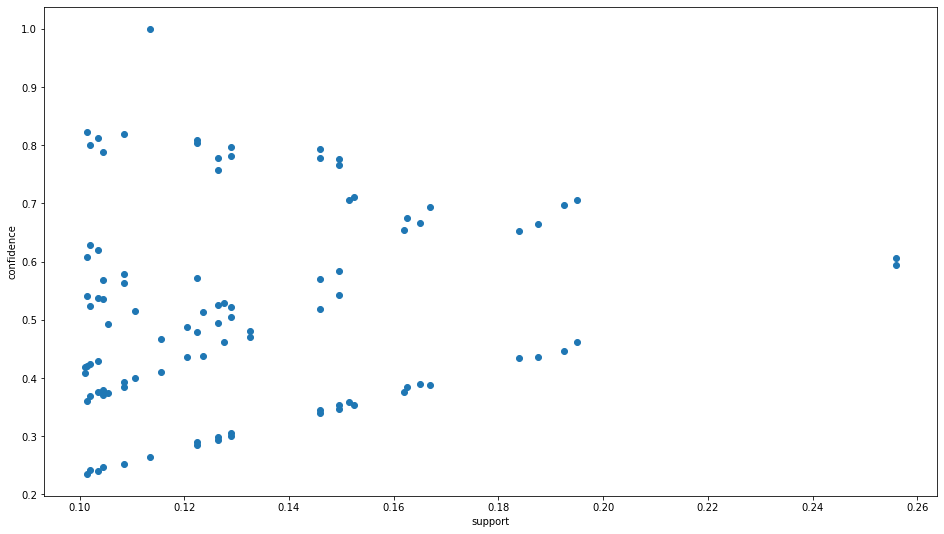

In [32]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule3['support'],rule3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

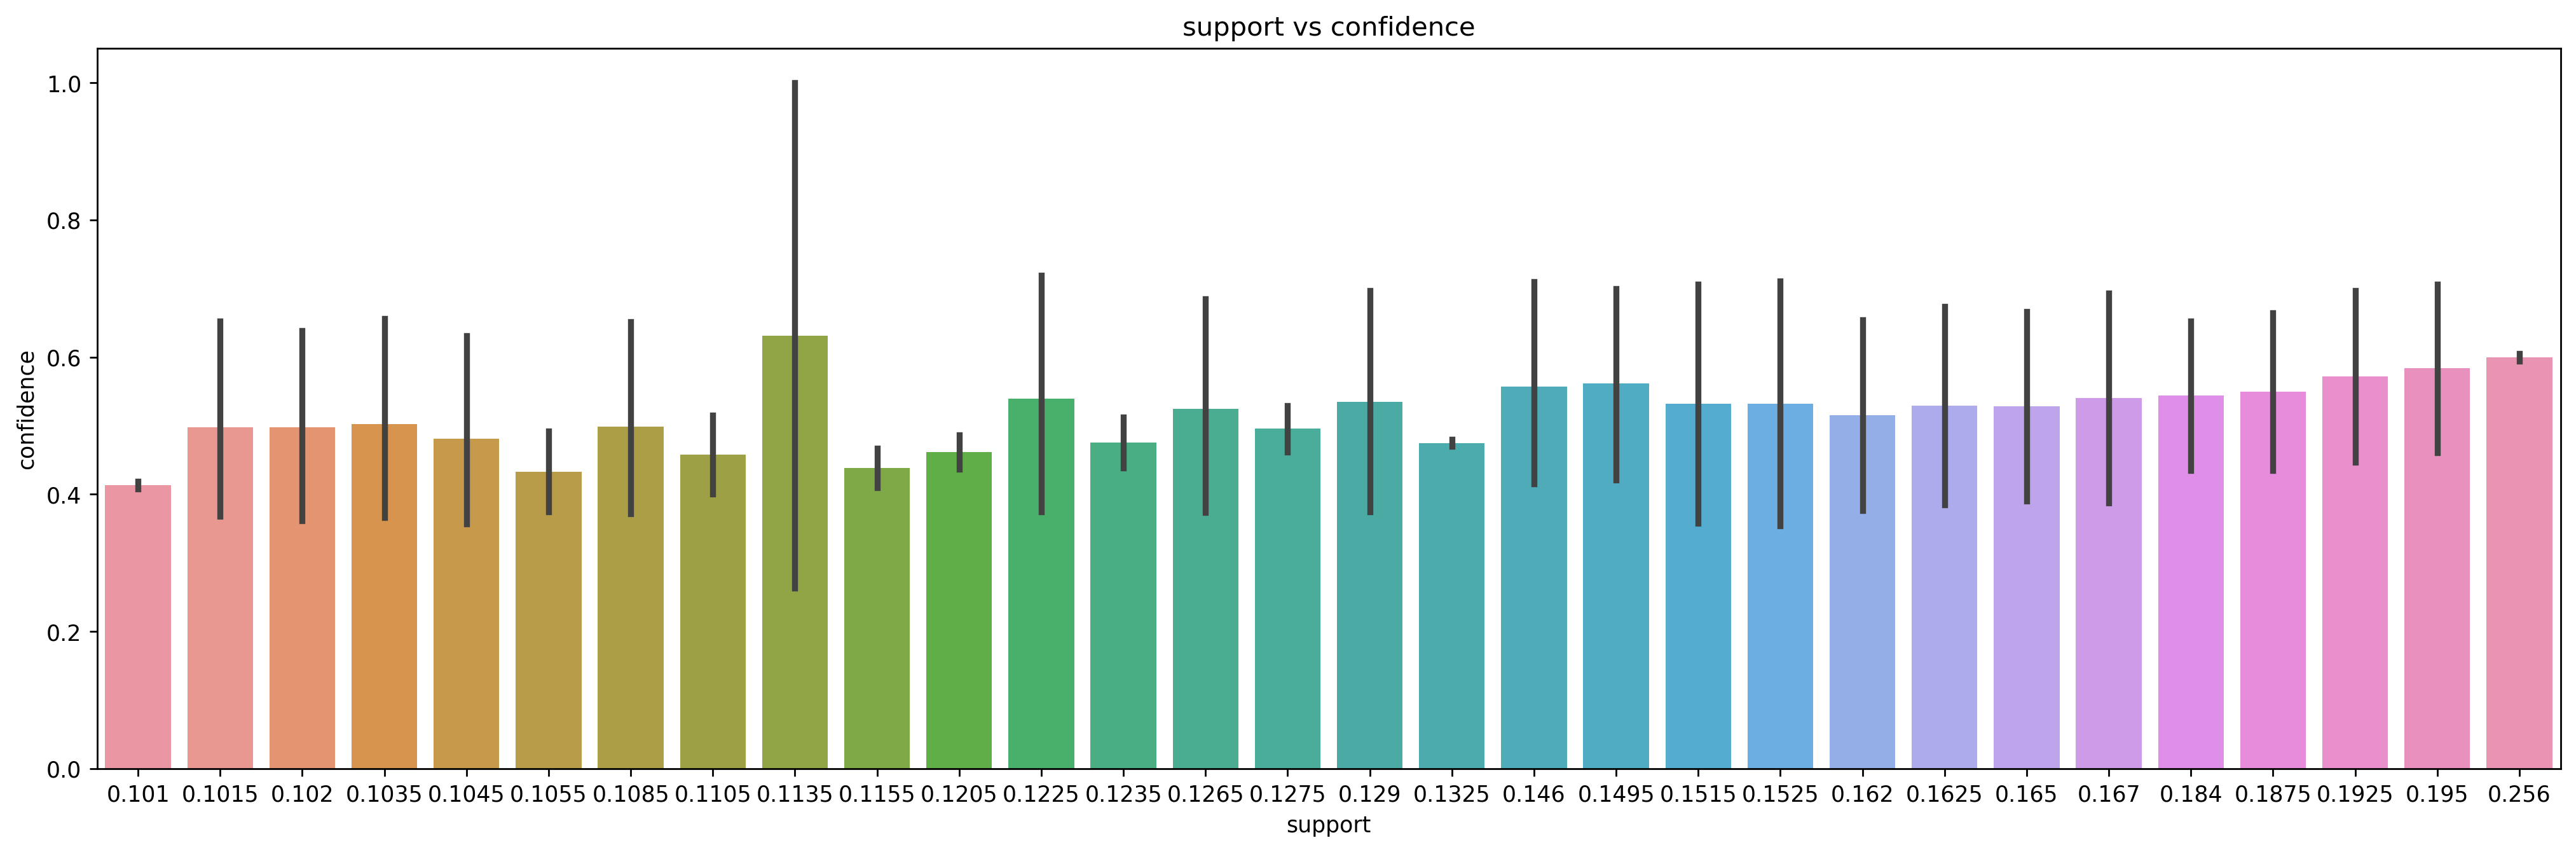

In [33]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rule3)
plt.title("support vs confidence")
plt.show()

**Min Support = 0.07 Confidence = 80%**

In [34]:
frequent_itemsets4 = apriori(df, min_support = 0.07, use_colnames=True)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(CookBks, DoItYBks, ChildBks, RefBks)"
62,0.0820,"(CookBks, DoItYBks, ChildBks, ArtBks)"
63,0.0890,"(GeogBks, CookBks, DoItYBks, ChildBks)"
64,0.0785,"(GeogBks, CookBks, ChildBks, RefBks)"


In [35]:
rule4 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .80)
rule4.shape

(306, 10)

**Visualisation of rule with min Support = 7%, Confidence = 80%**

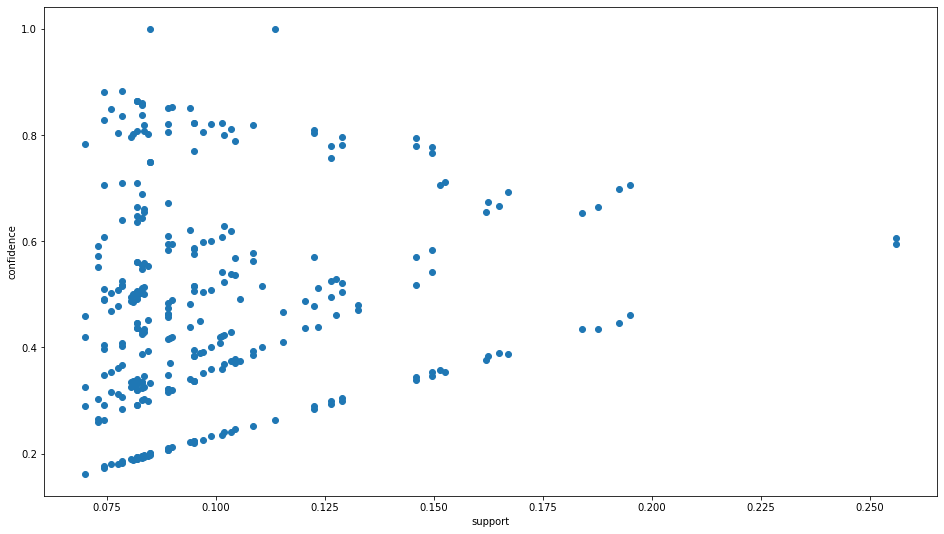

In [36]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule4['support'],rule4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

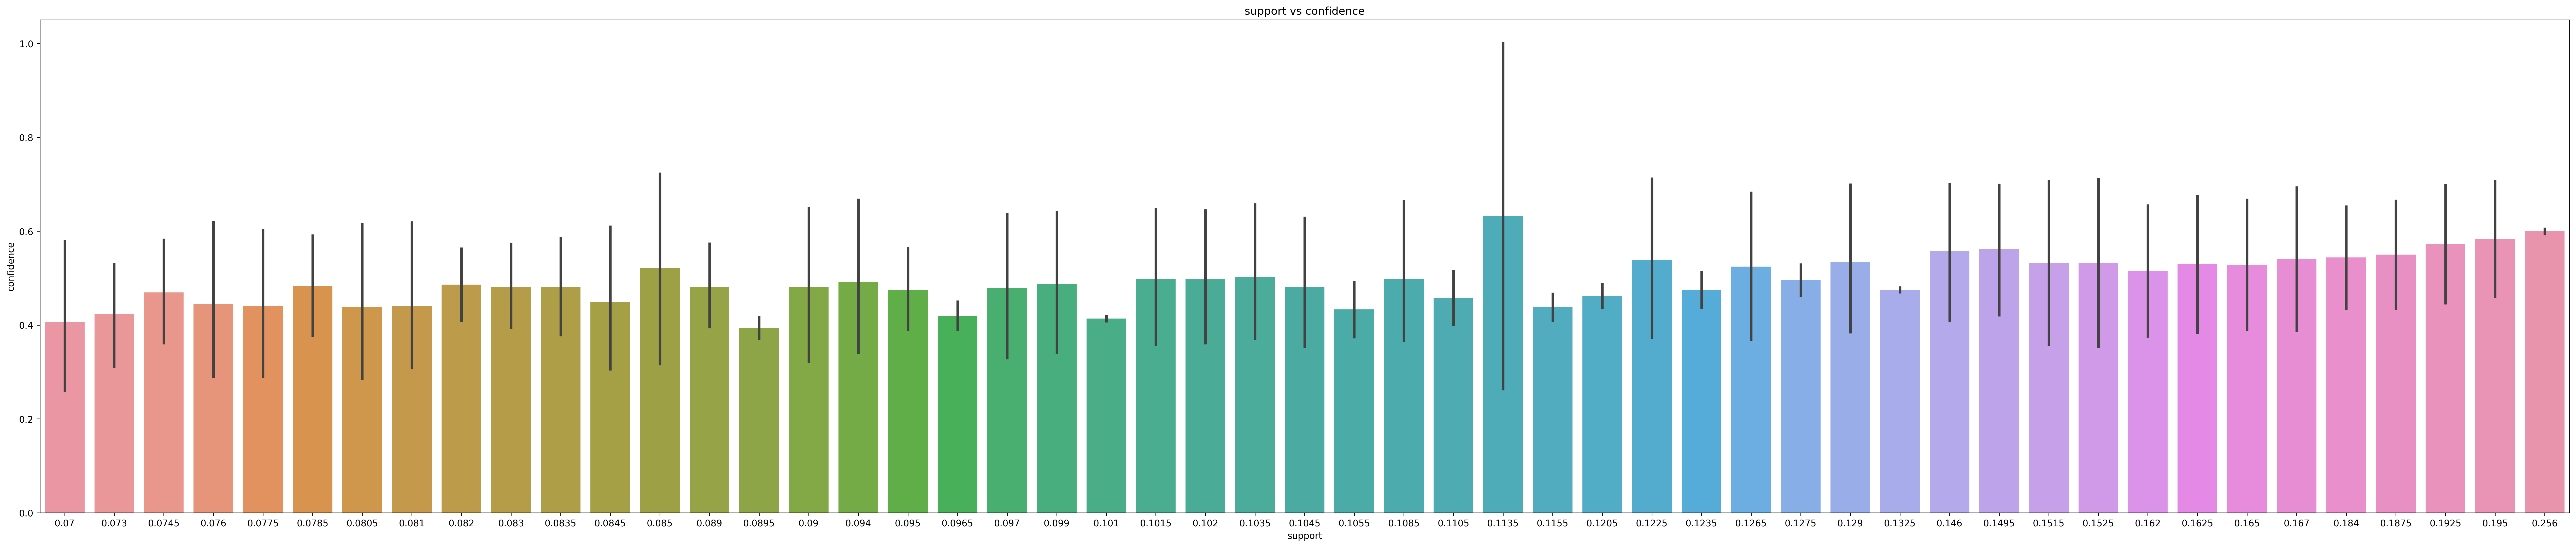

In [37]:
plt.figure(figsize=(50,10),dpi=250)
sns.barplot("support","confidence",data=rule4)
plt.title("support vs confidence")
plt.show()

**Min Support = 7%, Confidence = 70%**

In [39]:
rule5 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .70)
rule5.shape

(306, 10)

**Visualisation of rule with Min Support = 7%, Confidence = 60%**

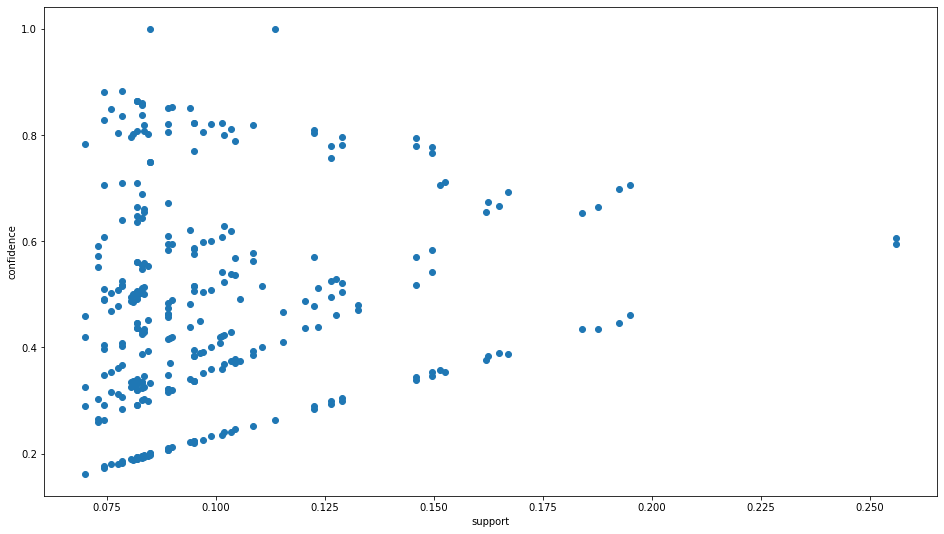

In [40]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule5['support'],rule5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

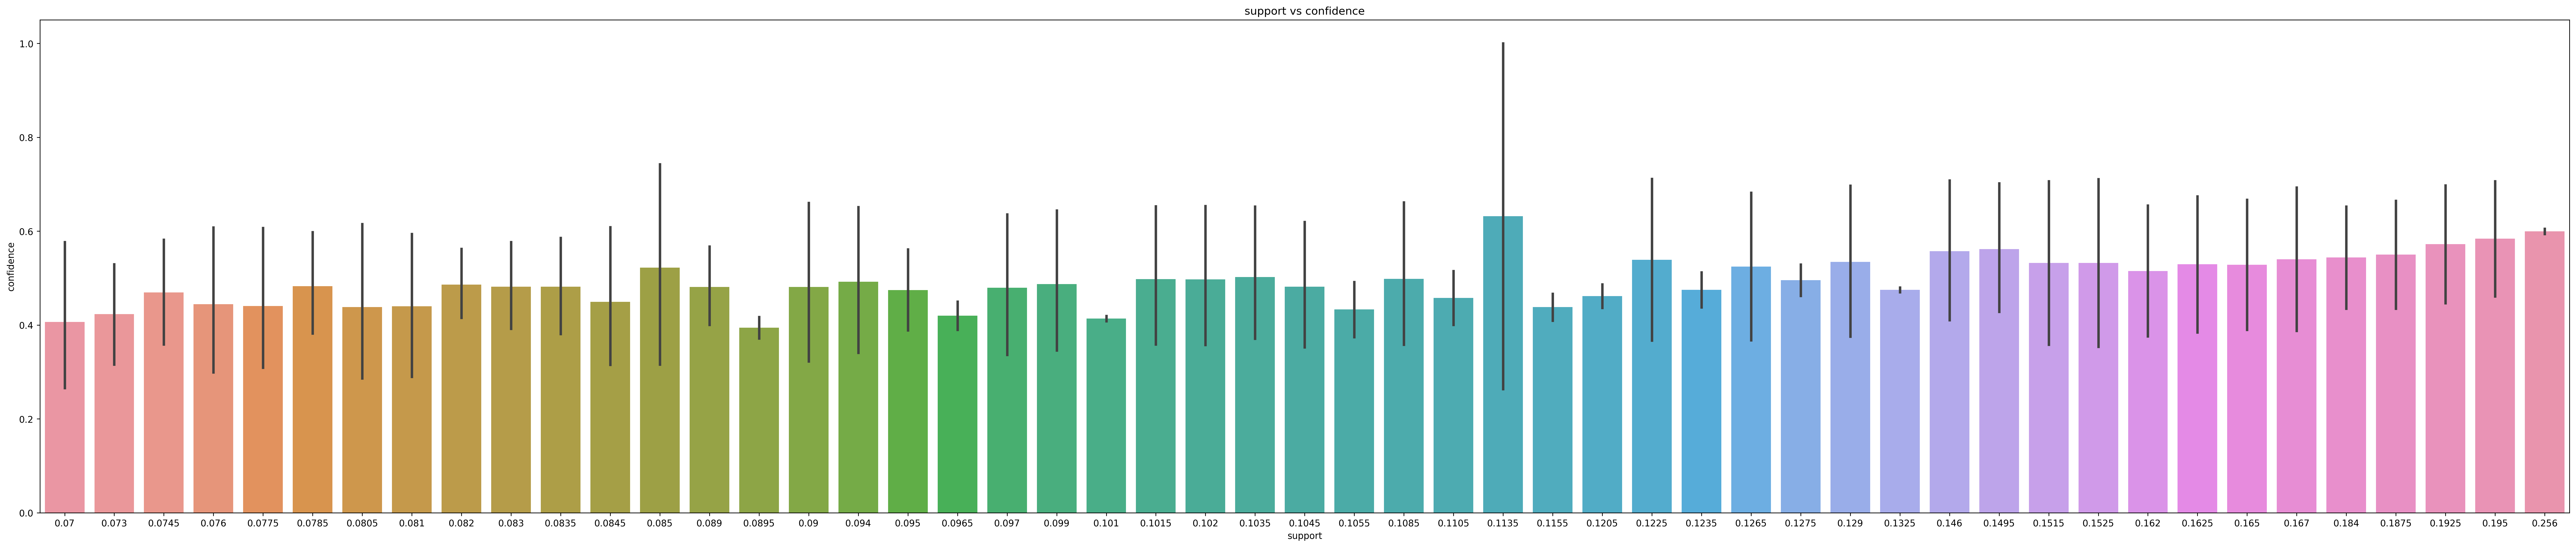

In [41]:
plt.figure(figsize=(50,10),dpi=250)
sns.barplot("support","confidence",data=rule5)
plt.title("support vs confidence")
plt.show()

**Min Support = 7%, Confidence = 60%**

In [42]:
rule6 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .60)
rule6.shape

(306, 10)

**Visualisation of rule with Min Support = 7%, Confidence = 60%**

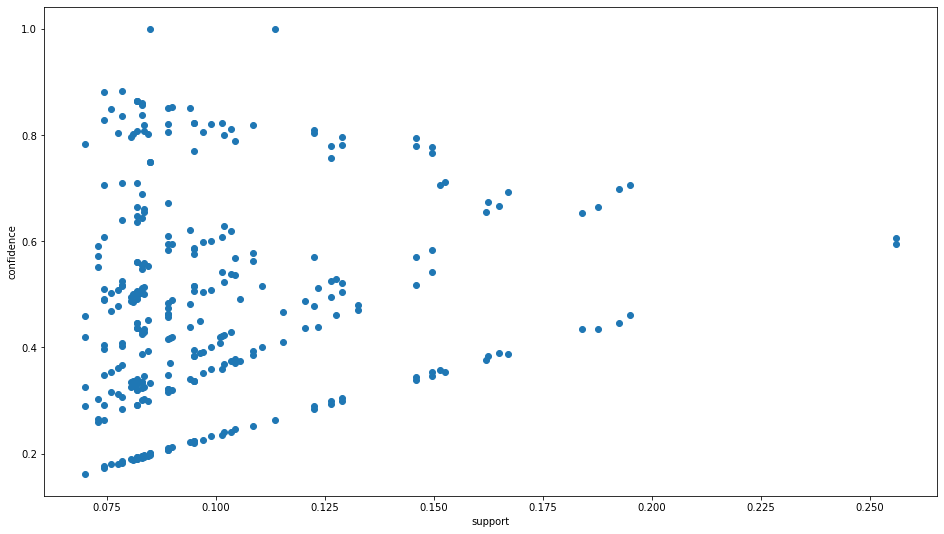

In [43]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule6['support'],rule6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

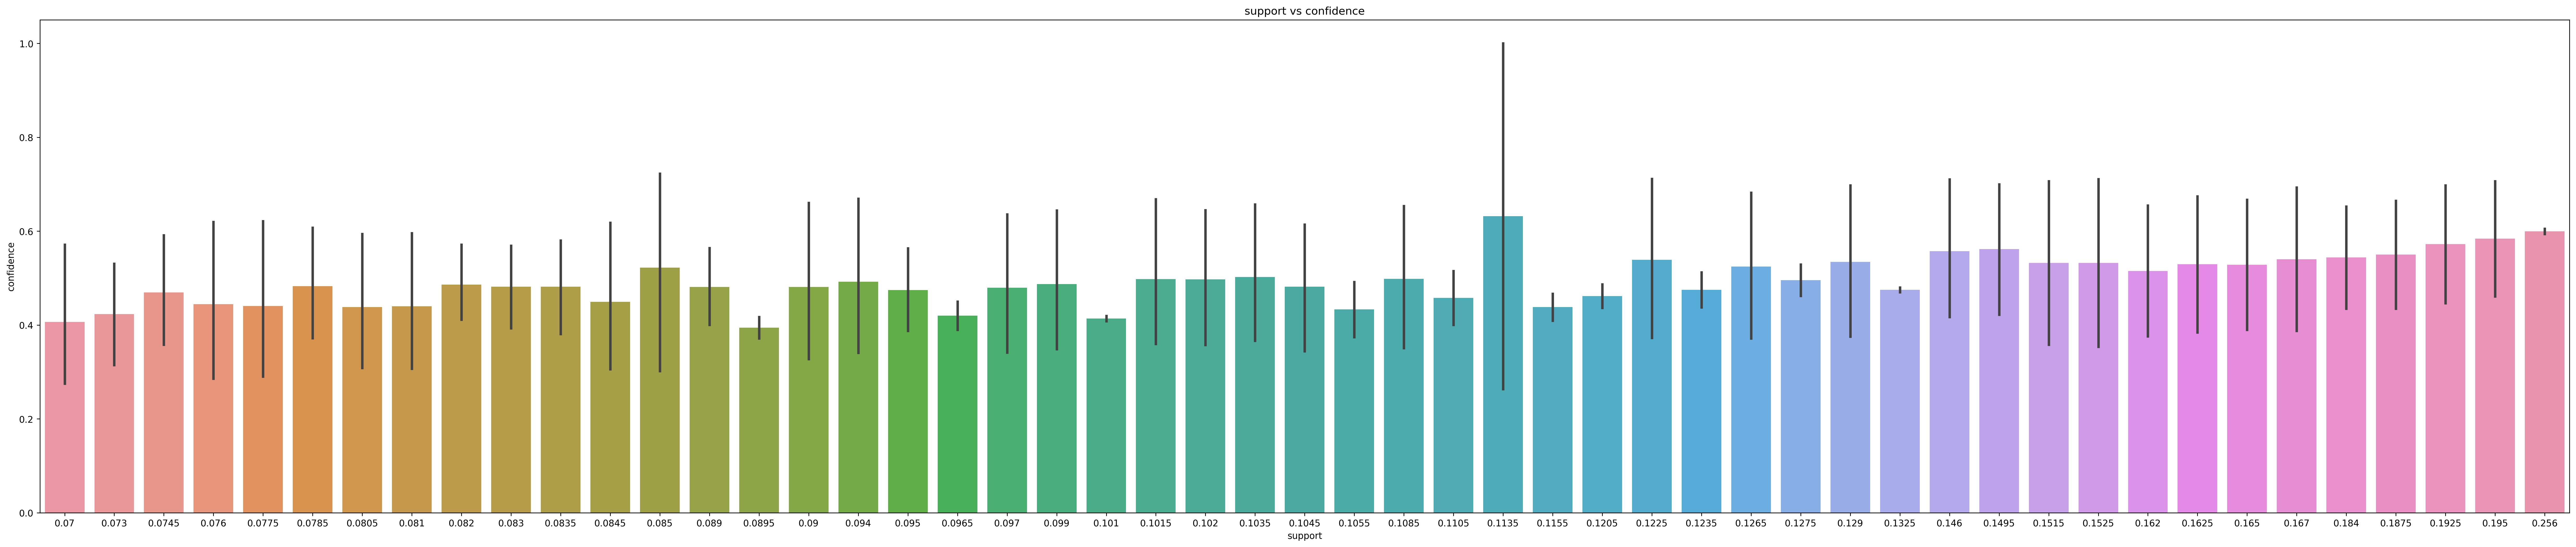

In [44]:
plt.figure(figsize=(50,10),dpi=250)
sns.barplot("support","confidence",data=rule6)
plt.title("support vs confidence")
plt.show()

In this dataset we can confirm if min support is reduced, number of rules are increased but if confidence chnages there is no difference in number of rules.

Also we can observe if we lower the min support then we get higher lengths of column clubbed together.